In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 232 from PyObject


In [2]:
X,  y = load_breast_cancer().data, load_breast_cancer().target.reshape(-1,1)

In [3]:
X.shape, y.shape

((569, 30), (569, 1))

In [21]:
class nn_multilayer(object):
    def __init__(self, eta =0.05 , iterations = 2000, epsilon = 0.01, layer_dims = [30,50,50,1]):
        self.eta = eta
        self.iterations = iterations
        self.layer_dims = layer_dims
        self.epsilon = epsilon
        self.layers = len(layer_dims)
        
    def fit(self,X,y):
        i = 1
        m_ = len(y)
        cost_ = []
        acc_ = []
        X_ = X.T
        y_ = y.T
        A = X_
        #initial values
        '''
        W1 = np.random.rand(layer_dims[1],layer_dims[0]) * self.epsilon   # 50x30
        b1 = np.zeros((layer_dims[1],1))                                  # 50x 1
        W2 = np.random.rand(layer_dims[2],layer_dims[1]) * self.epsilon   # 50 x 50
        b2 = np.zeros((layer_dims[2],1))                                  # 50x1
        W3 = np.random.rand(layer_dims[3],layer_dims[2]) * self.epsilon   # 1x50
        b3 = np.zeros((layer_dims[3],1))                                  # 1x1
        '''
        parameters = {}
        for l in range(1,self.layers):
            parameters['W'+str(l)] = np.random.randn(self.layer_dims[l],self.layer_dims[l-1]) * self.epsilon
            parameters['b'+str(l)] = np.zeros((self.layer_dims[l],1))
                                        
        while(i != self.iterations):
            Z1 = np.dot(parameters['W1'],A) + parameters['b1']
            A1 = self.sigmoid(Z1)
            Z2 = np.dot(parameters['W2'],A1) + parameters['b2']
            A2 = self.sigmoid(Z2)
            Z3 = np.dot(parameters['W3'],A2) + parameters['b3']
            A3 = self.sigmoid(Z3)
            #cost
            cost = -(1/m_) * np.sum(y_ * np.log(A[self.layers-1]) + (1-y_) * np.log(1-A[self.layers-1]))
            cost_.append(cost)
            acc = self.acc(y_,np.where(A3>0.5,1,0),m_)
            acc_.append(acc)
            #derivatives
            dZ3 = A3  - y_
            dW3 = (1/m_) * np.dot(dZ3,A2.T)
            db3 = (1/m_) * np.sum(dZ3, axis =1 , keepdims= True)
            dZ2 = np.dot(parameters['W3'].T,dZ3) * (A2 * (1-A2))
            dW2 = (1/m_) * np.dot(dZ2,A1.T)
            db2 = (1/m_) * np.sum(dZ2, axis =1 , keepdims= True)
            dZ1 = np.dot(parameters['W2'].T,dZ2) * (A1 * (1-A1))
            dW1 = (1/m_) * np.dot(dZ1,A.T)
            db1 = (1/m_) *np.sum(dZ1, axis =1 , keepdims= True)
            #updates
            parameters['W3'] -= self.eta * dW3
            parameters['b3']  -= self.eta * db3
            parameters['W2'] -= self.eta * dW2
            parameters['b2'] -= self.eta * db2
            parameters['W1'] -= self.eta * dW1
            parameters['b1'] -= self.eta * db1
            #print
            if i % 200 == 0:
                print(f'epochs{i}_cost:{cost}_acc:{acc}')
            i +=1
        history = pd.DataFrame(cost_,columns=['cost'])
        history['acc'] = acc_
        plt.figure(figsize = (14,4))
        plt.suptitle(f'Monitoring Cost Function {self.eta} {self.iterations} {self.layer_dims}')
        plt.subplot(1,2,1)
        plt.plot(history.acc)
        plt.subplot(1,2,2)
        plt.plot(history.cost)
        plt.show()
        return parameters
    
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    
    def acc(self,y_true,y_pred,m_):
        return np.sum(y_true == y_pred)/m_
    

    
    

<ipython-input-21-14f4b6f2ded9>:39: RuntimeWarning: invalid value encountered in log
  cost = -(1/m_) * np.sum(y_ * np.log(A[self.layers-1]) + (1-y_) * np.log(1-A[self.layers-1]))


epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963


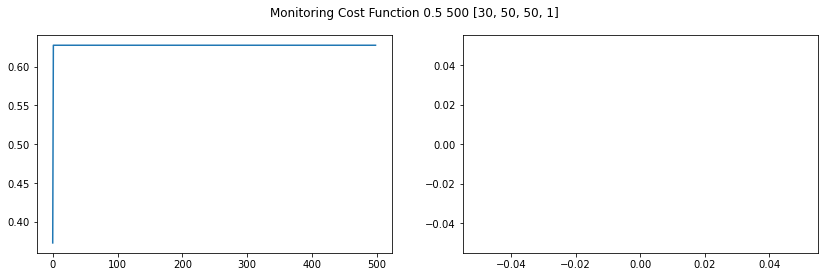

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963
epochs600_cost:nan_acc:0.6274165202108963
epochs800_cost:nan_acc:0.6274165202108963


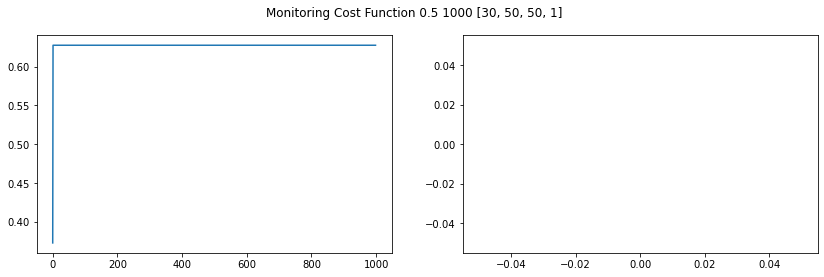

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963
epochs600_cost:nan_acc:0.6274165202108963
epochs800_cost:nan_acc:0.6274165202108963
epochs1000_cost:nan_acc:0.6274165202108963
epochs1200_cost:nan_acc:0.6274165202108963
epochs1400_cost:nan_acc:0.6274165202108963
epochs1600_cost:nan_acc:0.6274165202108963
epochs1800_cost:nan_acc:0.6274165202108963
epochs2000_cost:nan_acc:0.6274165202108963
epochs2200_cost:nan_acc:0.6274165202108963
epochs2400_cost:nan_acc:0.6274165202108963
epochs2600_cost:nan_acc:0.6274165202108963
epochs2800_cost:nan_acc:0.6274165202108963
epochs3000_cost:nan_acc:0.6274165202108963
epochs3200_cost:nan_acc:0.6274165202108963
epochs3400_cost:nan_acc:0.6274165202108963
epochs3600_cost:nan_acc:0.6274165202108963
epochs3800_cost:nan_acc:0.6274165202108963
epochs4000_cost:nan_acc:0.6274165202108963
epochs4200_cost:nan_acc:0.6274165202108963
epochs4400_cost:nan_acc:0.6274165202108963
epochs4600_cost:nan_acc:0.6274165202108963
epochs4800_cost

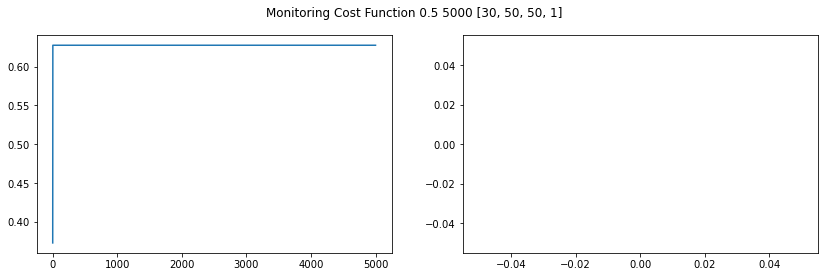

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963


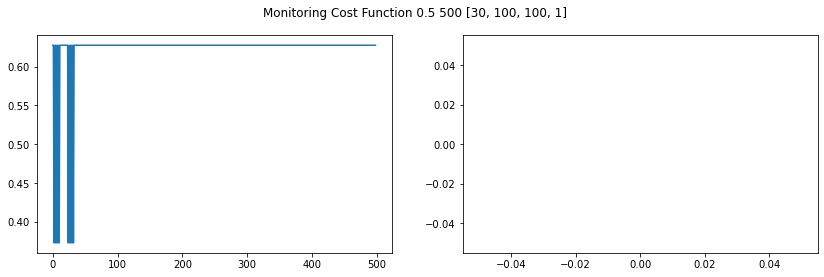

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963
epochs600_cost:nan_acc:0.6274165202108963
epochs800_cost:nan_acc:0.6274165202108963


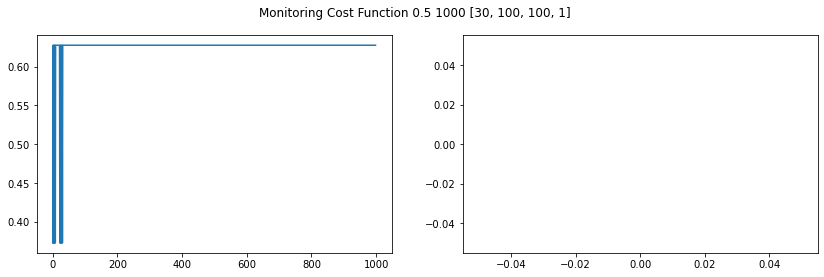

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963
epochs600_cost:nan_acc:0.6274165202108963
epochs800_cost:nan_acc:0.6274165202108963
epochs1000_cost:nan_acc:0.6274165202108963
epochs1200_cost:nan_acc:0.6274165202108963
epochs1400_cost:nan_acc:0.6274165202108963
epochs1600_cost:nan_acc:0.6274165202108963
epochs1800_cost:nan_acc:0.6274165202108963
epochs2000_cost:nan_acc:0.6274165202108963
epochs2200_cost:nan_acc:0.6274165202108963
epochs2400_cost:nan_acc:0.6274165202108963
epochs2600_cost:nan_acc:0.6274165202108963
epochs2800_cost:nan_acc:0.6274165202108963
epochs3000_cost:nan_acc:0.6274165202108963
epochs3200_cost:nan_acc:0.6274165202108963
epochs3400_cost:nan_acc:0.6274165202108963
epochs3600_cost:nan_acc:0.6274165202108963
epochs3800_cost:nan_acc:0.6274165202108963
epochs4000_cost:nan_acc:0.6274165202108963
epochs4200_cost:nan_acc:0.6274165202108963
epochs4400_cost:nan_acc:0.6274165202108963
epochs4600_cost:nan_acc:0.6274165202108963
epochs4800_cost

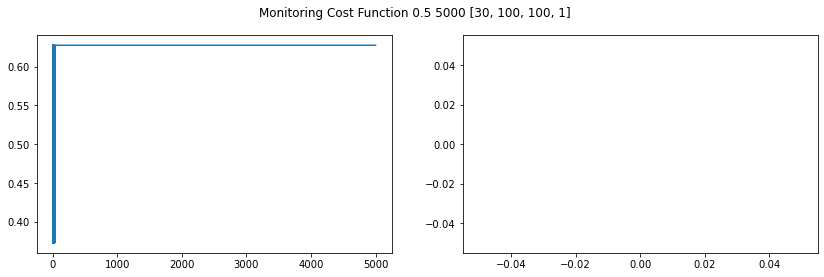

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963


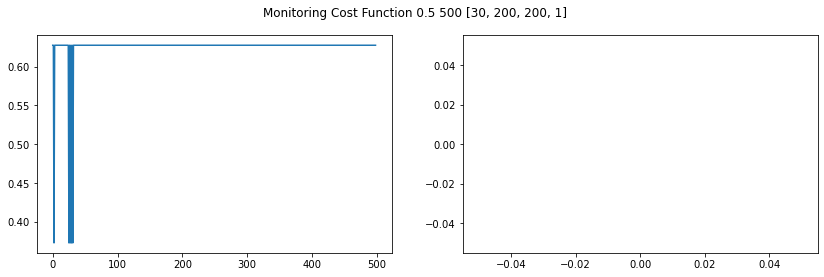

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963
epochs600_cost:nan_acc:0.6274165202108963
epochs800_cost:nan_acc:0.6274165202108963


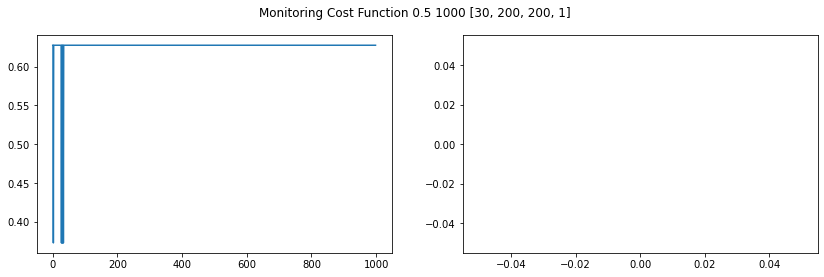

<ipython-input-21-14f4b6f2ded9>:76: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963
epochs600_cost:nan_acc:0.6274165202108963
epochs800_cost:nan_acc:0.6274165202108963
epochs1000_cost:nan_acc:0.6274165202108963
epochs1200_cost:nan_acc:0.6274165202108963
epochs1400_cost:nan_acc:0.6274165202108963
epochs1600_cost:nan_acc:0.6274165202108963
epochs1800_cost:nan_acc:0.6274165202108963
epochs2000_cost:nan_acc:0.6274165202108963
epochs2200_cost:nan_acc:0.6274165202108963
epochs2400_cost:nan_acc:0.6274165202108963
epochs2600_cost:nan_acc:0.6274165202108963
epochs2800_cost:nan_acc:0.6274165202108963
epochs3000_cost:nan_acc:0.6274165202108963
epochs3200_cost:nan_acc:0.6274165202108963
epochs3400_cost:nan_acc:0.6274165202108963
epochs3600_cost:nan_acc:0.6274165202108963
epochs3800_cost:nan_acc:0.6274165202108963
epochs4000_cost:nan_acc:0.6274165202108963
epochs4200_cost:nan_acc:0.6274165202108963
epochs4400_cost:nan_acc:0.6274165202108963
epochs4600_cost:nan_acc:0.6274165202108963
epochs4800_cost

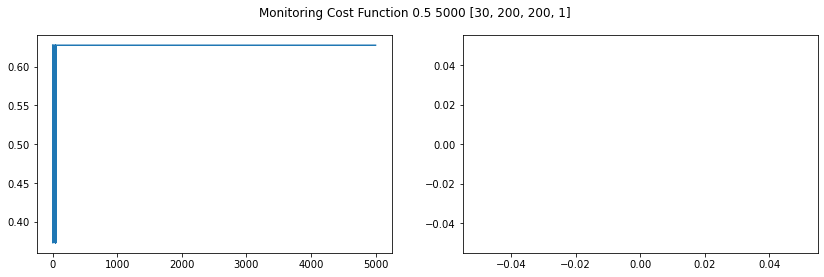

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963


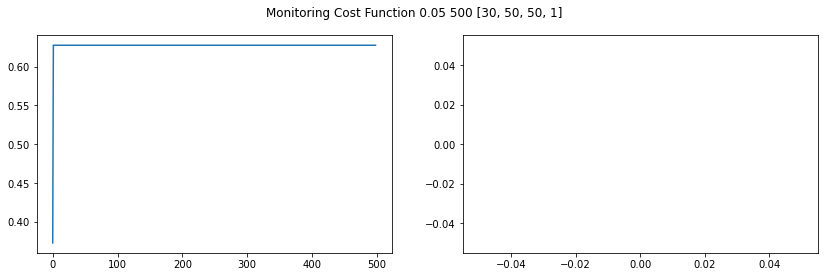

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963
epochs600_cost:nan_acc:0.7486818980667839
epochs800_cost:nan_acc:0.7451669595782073


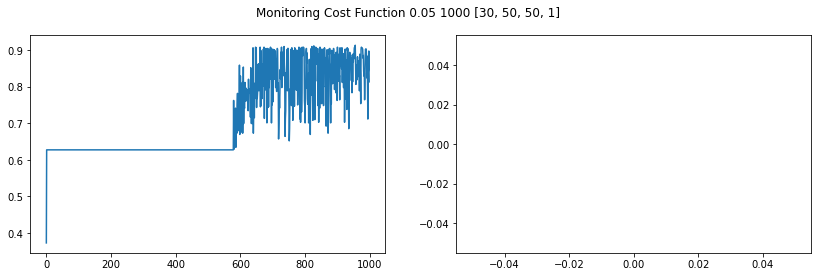

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963
epochs600_cost:nan_acc:0.6274165202108963
epochs800_cost:nan_acc:0.6695957820738138
epochs1000_cost:nan_acc:0.7978910369068541
epochs1200_cost:nan_acc:0.9033391915641477
epochs1400_cost:nan_acc:0.8699472759226714
epochs1600_cost:nan_acc:0.8172231985940246
epochs1800_cost:nan_acc:0.9068541300527241
epochs2000_cost:nan_acc:0.8717047451669596
epochs2200_cost:nan_acc:0.9086115992970123
epochs2400_cost:nan_acc:0.5957820738137083
epochs2600_cost:nan_acc:0.8927943760984183
epochs2800_cost:nan_acc:0.9121265377855887
epochs3000_cost:nan_acc:0.7785588752196837
epochs3200_cost:nan_acc:0.8699472759226714
epochs3400_cost:nan_acc:0.8910369068541301
epochs3600_cost:nan_acc:0.9156414762741653
epochs3800_cost:nan_acc:0.9103690685413005
epochs4000_cost:nan_acc:0.8998242530755711
epochs4200_cost:nan_acc:0.9138840070298769
epochs4400_cost:nan_acc:0.9156414762741653
epochs4600_cost:nan_acc:0.9173989455184535
epochs4800_cost

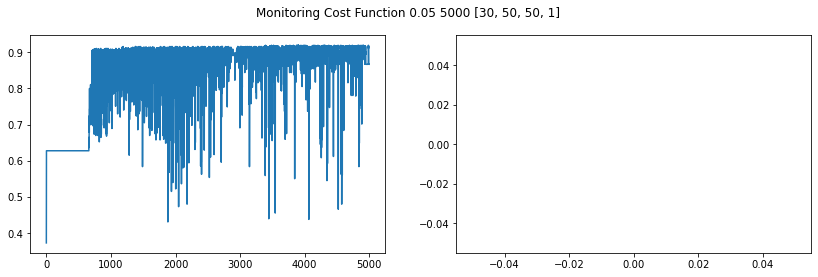

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963


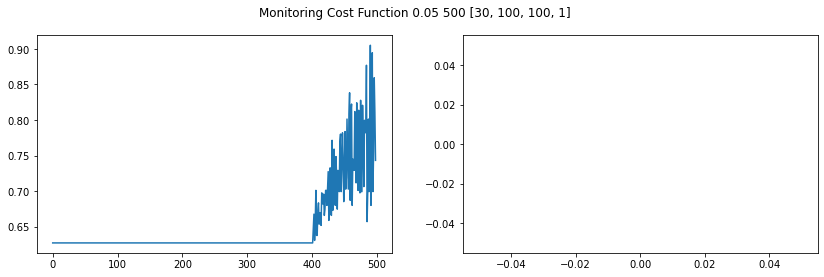

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6397188049209139
epochs600_cost:nan_acc:0.6590509666080844
epochs800_cost:nan_acc:0.9086115992970123


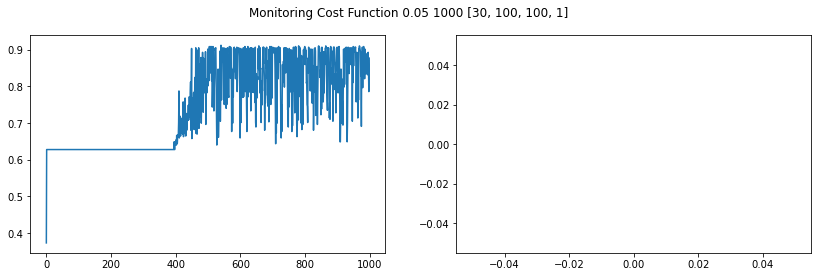

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963
epochs600_cost:nan_acc:0.7715289982425307
epochs800_cost:nan_acc:0.9103690685413005
epochs1000_cost:nan_acc:0.7750439367311072
epochs1200_cost:nan_acc:0.9103690685413005
epochs1400_cost:nan_acc:0.9138840070298769
epochs1600_cost:nan_acc:0.7504393673110721
epochs1800_cost:nan_acc:0.8892794376098418
epochs2000_cost:nan_acc:0.8787346221441125
epochs2200_cost:nan_acc:0.7592267135325131
epochs2400_cost:nan_acc:0.7697715289982425
epochs2600_cost:nan_acc:0.9050966608084359
epochs2800_cost:nan_acc:0.8927943760984183
epochs3000_cost:nan_acc:0.9156414762741653
epochs3200_cost:nan_acc:0.9156414762741653
epochs3400_cost:nan_acc:0.9156414762741653
epochs3600_cost:nan_acc:0.9156414762741653
epochs3800_cost:nan_acc:0.9138840070298769
epochs4000_cost:nan_acc:0.8945518453427065
epochs4200_cost:nan_acc:0.9103690685413005
epochs4400_cost:nan_acc:0.9068541300527241
epochs4600_cost:nan_acc:0.9086115992970123
epochs4800_cost

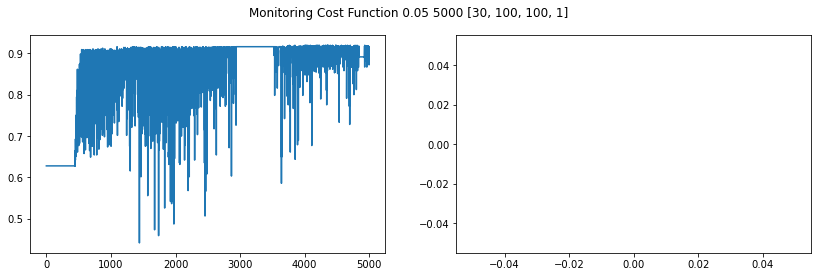

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.8066783831282952


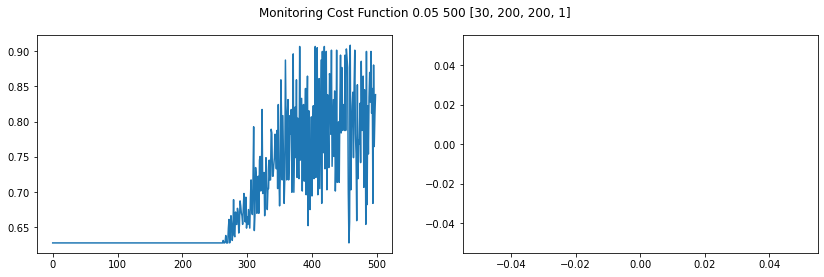

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.8347978910369068
epochs600_cost:nan_acc:0.9033391915641477
epochs800_cost:nan_acc:0.7662565905096661


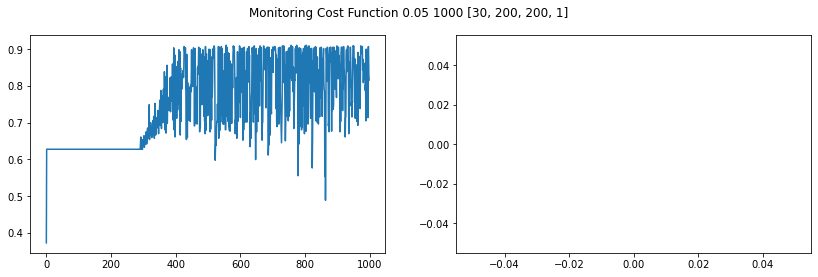

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.7750439367311072
epochs600_cost:nan_acc:0.7135325131810193
epochs800_cost:nan_acc:0.836555360281195
epochs1000_cost:nan_acc:0.7978910369068541
epochs1200_cost:nan_acc:0.9086115992970123
epochs1400_cost:nan_acc:0.9138840070298769
epochs1600_cost:nan_acc:0.8892794376098418
epochs1800_cost:nan_acc:0.9086115992970123
epochs2000_cost:nan_acc:0.9138840070298769
epochs2200_cost:nan_acc:0.9156414762741653
epochs2400_cost:nan_acc:0.9103690685413005
epochs2600_cost:nan_acc:0.9156414762741653
epochs2800_cost:nan_acc:0.804920913884007
epochs3000_cost:nan_acc:0.827768014059754
epochs3200_cost:nan_acc:0.8699472759226714
epochs3400_cost:nan_acc:0.875219683655536
epochs3600_cost:nan_acc:0.8576449912126538
epochs3800_cost:nan_acc:0.8717047451669596
epochs4000_cost:nan_acc:0.9156414762741653
epochs4200_cost:nan_acc:0.9138840070298769
epochs4400_cost:nan_acc:0.9015817223198594
epochs4600_cost:nan_acc:0.8840070298769771
epochs4800_cost:nan

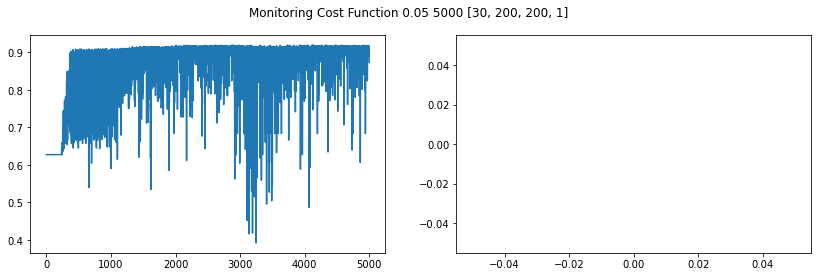

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963


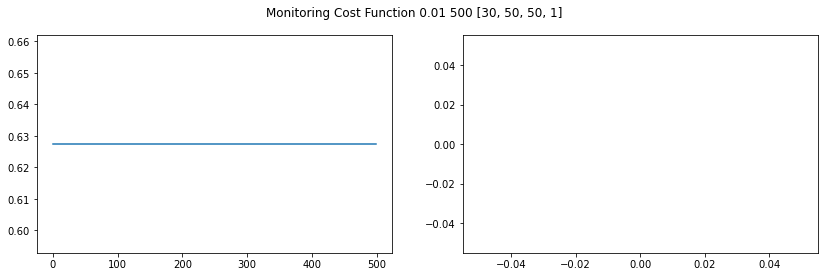

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963
epochs600_cost:nan_acc:0.6274165202108963
epochs800_cost:nan_acc:0.6274165202108963


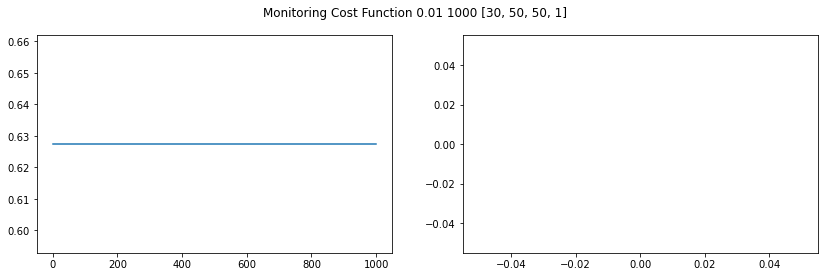

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963
epochs600_cost:nan_acc:0.6274165202108963
epochs800_cost:nan_acc:0.6274165202108963
epochs1000_cost:nan_acc:0.6274165202108963
epochs1200_cost:nan_acc:0.6274165202108963
epochs1400_cost:nan_acc:0.6274165202108963
epochs1600_cost:nan_acc:0.6274165202108963
epochs1800_cost:nan_acc:0.6274165202108963
epochs2000_cost:nan_acc:0.6274165202108963
epochs2200_cost:nan_acc:0.6274165202108963
epochs2400_cost:nan_acc:0.9068541300527241
epochs2600_cost:nan_acc:0.9068541300527241
epochs2800_cost:nan_acc:0.9156414762741653
epochs3000_cost:nan_acc:0.9015817223198594
epochs3200_cost:nan_acc:0.8980667838312829
epochs3400_cost:nan_acc:0.9173989455184535
epochs3600_cost:nan_acc:0.8611599297012302
epochs3800_cost:nan_acc:0.9156414762741653
epochs4000_cost:nan_acc:0.9156414762741653
epochs4200_cost:nan_acc:0.9156414762741653
epochs4400_cost:nan_acc:0.9226713532513181
epochs4600_cost:nan_acc:0.9191564147627417
epochs4800_cost

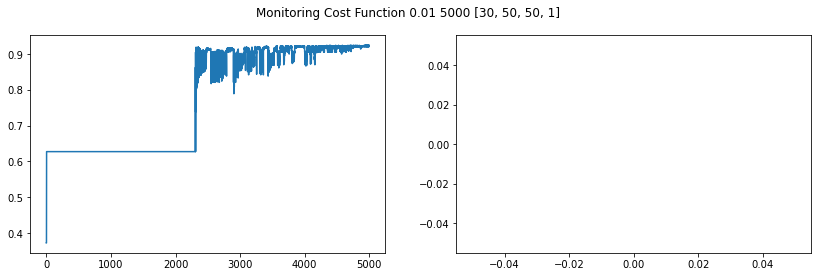

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963


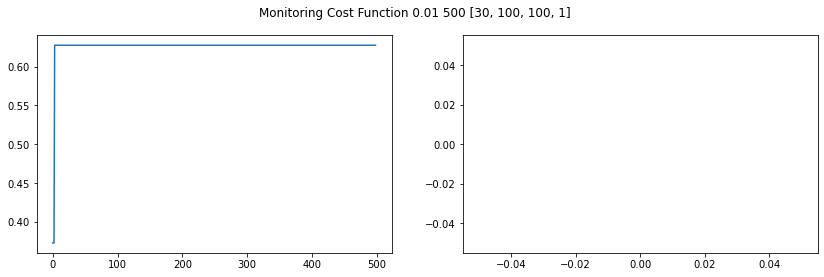

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963
epochs600_cost:nan_acc:0.6274165202108963
epochs800_cost:nan_acc:0.6274165202108963


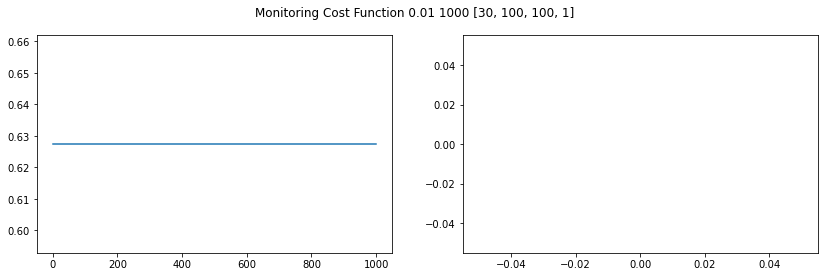

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963
epochs600_cost:nan_acc:0.6274165202108963
epochs800_cost:nan_acc:0.6274165202108963
epochs1000_cost:nan_acc:0.6274165202108963
epochs1200_cost:nan_acc:0.6274165202108963
epochs1400_cost:nan_acc:0.6274165202108963
epochs1600_cost:nan_acc:0.6274165202108963
epochs1800_cost:nan_acc:0.8031634446397188
epochs2000_cost:nan_acc:0.8488576449912126
epochs2200_cost:nan_acc:0.8172231985940246
epochs2400_cost:nan_acc:0.9121265377855887
epochs2600_cost:nan_acc:0.8963093145869947
epochs2800_cost:nan_acc:0.9033391915641477
epochs3000_cost:nan_acc:0.9156414762741653
epochs3200_cost:nan_acc:0.9121265377855887
epochs3400_cost:nan_acc:0.9156414762741653
epochs3600_cost:nan_acc:0.9173989455184535
epochs3800_cost:nan_acc:0.9191564147627417
epochs4000_cost:nan_acc:0.9173989455184535
epochs4200_cost:nan_acc:0.9209138840070299
epochs4400_cost:nan_acc:0.9209138840070299
epochs4600_cost:nan_acc:0.9261862917398945
epochs4800_cost

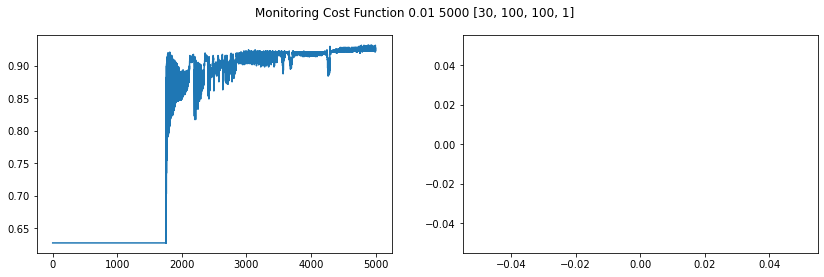

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963


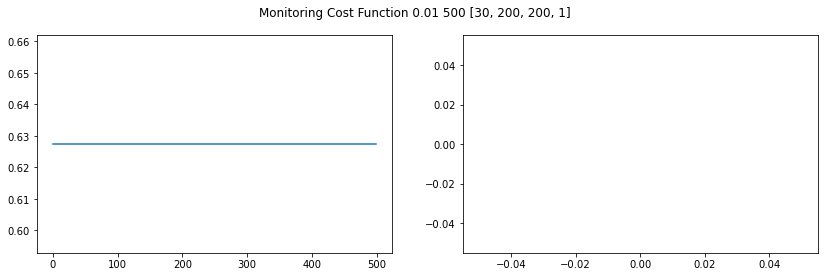

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963
epochs600_cost:nan_acc:0.6274165202108963
epochs800_cost:nan_acc:0.6274165202108963


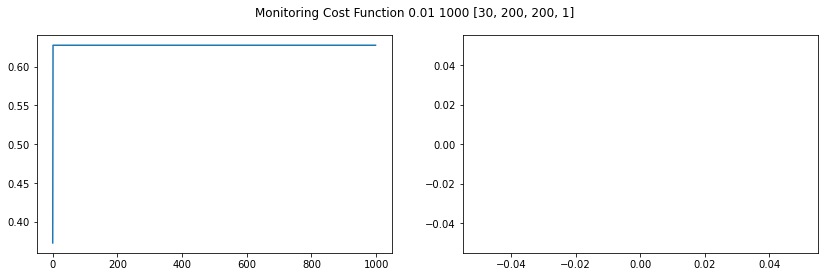

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963
epochs600_cost:nan_acc:0.6274165202108963
epochs800_cost:nan_acc:0.6274165202108963
epochs1000_cost:nan_acc:0.6274165202108963
epochs1200_cost:nan_acc:0.8998242530755711
epochs1400_cost:nan_acc:0.8840070298769771
epochs1600_cost:nan_acc:0.9015817223198594
epochs1800_cost:nan_acc:0.9050966608084359
epochs2000_cost:nan_acc:0.9068541300527241
epochs2200_cost:nan_acc:0.9156414762741653
epochs2400_cost:nan_acc:0.9209138840070299
epochs2600_cost:nan_acc:0.9103690685413005
epochs2800_cost:nan_acc:0.9209138840070299
epochs3000_cost:nan_acc:0.9209138840070299
epochs3200_cost:nan_acc:0.9209138840070299
epochs3400_cost:nan_acc:0.9209138840070299
epochs3600_cost:nan_acc:0.9209138840070299
epochs3800_cost:nan_acc:0.9226713532513181
epochs4000_cost:nan_acc:0.9226713532513181
epochs4200_cost:nan_acc:0.9226713532513181
epochs4400_cost:nan_acc:0.9244288224956063
epochs4600_cost:nan_acc:0.9244288224956063
epochs4800_cost

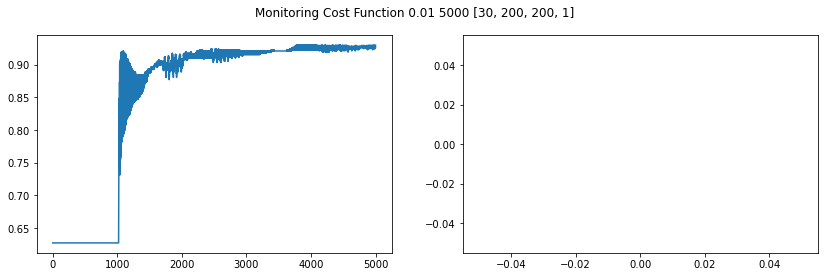

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963


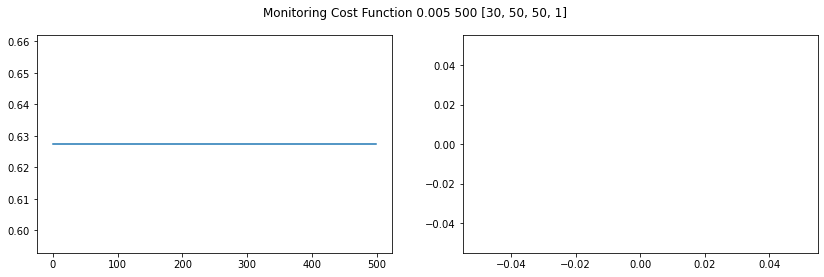

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963
epochs600_cost:nan_acc:0.6274165202108963
epochs800_cost:nan_acc:0.6274165202108963


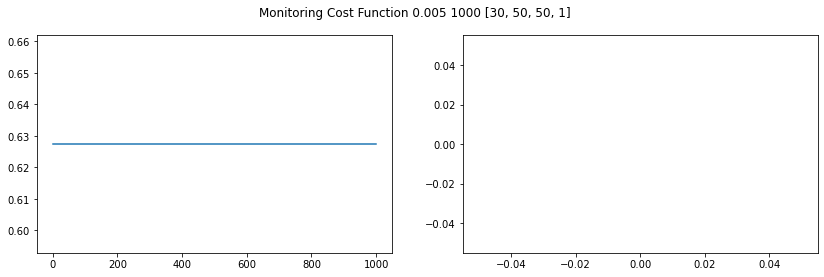

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963
epochs600_cost:nan_acc:0.6274165202108963
epochs800_cost:nan_acc:0.6274165202108963
epochs1000_cost:nan_acc:0.6274165202108963
epochs1200_cost:nan_acc:0.6274165202108963
epochs1400_cost:nan_acc:0.6274165202108963
epochs1600_cost:nan_acc:0.6274165202108963
epochs1800_cost:nan_acc:0.6274165202108963
epochs2000_cost:nan_acc:0.6274165202108963
epochs2200_cost:nan_acc:0.6274165202108963
epochs2400_cost:nan_acc:0.6274165202108963
epochs2600_cost:nan_acc:0.6274165202108963
epochs2800_cost:nan_acc:0.6274165202108963
epochs3000_cost:nan_acc:0.6274165202108963
epochs3200_cost:nan_acc:0.6274165202108963
epochs3400_cost:nan_acc:0.6274165202108963
epochs3600_cost:nan_acc:0.6274165202108963
epochs3800_cost:nan_acc:0.6274165202108963
epochs4000_cost:nan_acc:0.6274165202108963
epochs4200_cost:nan_acc:0.6274165202108963
epochs4400_cost:nan_acc:0.6274165202108963
epochs4600_cost:nan_acc:0.6274165202108963
epochs4800_cost

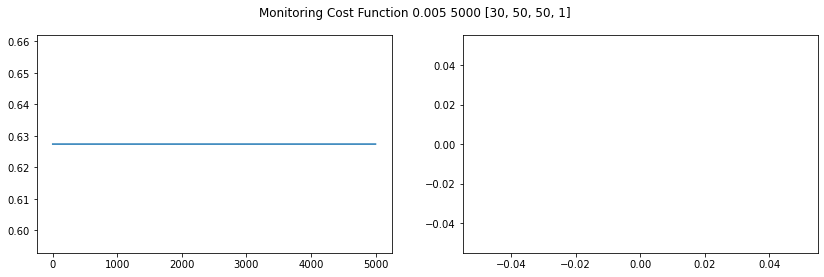

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963


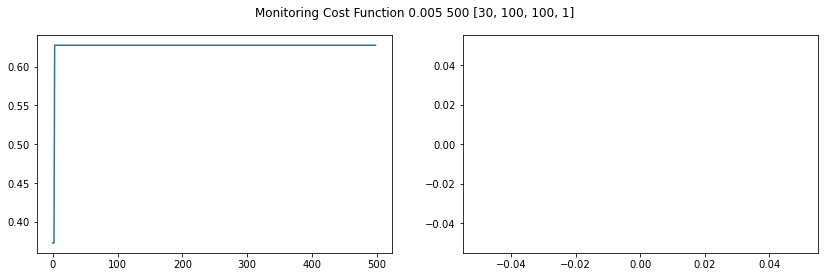

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963
epochs600_cost:nan_acc:0.6274165202108963
epochs800_cost:nan_acc:0.6274165202108963


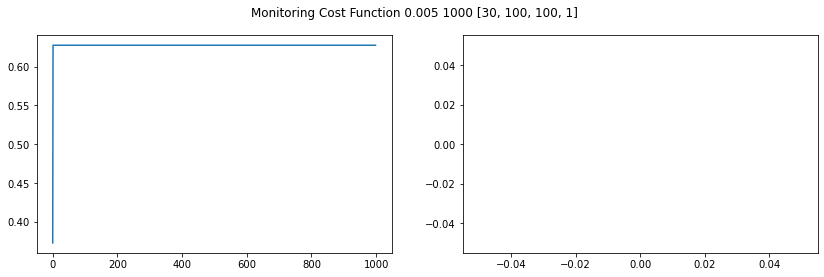

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963
epochs600_cost:nan_acc:0.6274165202108963
epochs800_cost:nan_acc:0.6274165202108963
epochs1000_cost:nan_acc:0.6274165202108963
epochs1200_cost:nan_acc:0.6274165202108963
epochs1400_cost:nan_acc:0.6274165202108963
epochs1600_cost:nan_acc:0.6274165202108963
epochs1800_cost:nan_acc:0.6274165202108963
epochs2000_cost:nan_acc:0.6274165202108963
epochs2200_cost:nan_acc:0.6274165202108963
epochs2400_cost:nan_acc:0.6274165202108963
epochs2600_cost:nan_acc:0.6274165202108963
epochs2800_cost:nan_acc:0.6274165202108963
epochs3000_cost:nan_acc:0.6274165202108963
epochs3200_cost:nan_acc:0.6274165202108963
epochs3400_cost:nan_acc:0.6274165202108963
epochs3600_cost:nan_acc:0.9015817223198594
epochs3800_cost:nan_acc:0.9138840070298769
epochs4000_cost:nan_acc:0.9191564147627417
epochs4200_cost:nan_acc:0.9015817223198594
epochs4400_cost:nan_acc:0.9191564147627417
epochs4600_cost:nan_acc:0.9191564147627417
epochs4800_cost

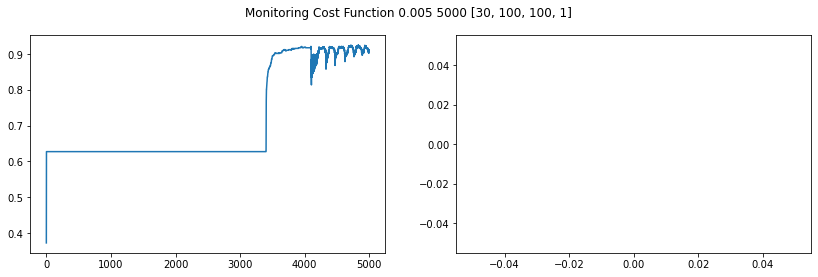

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963


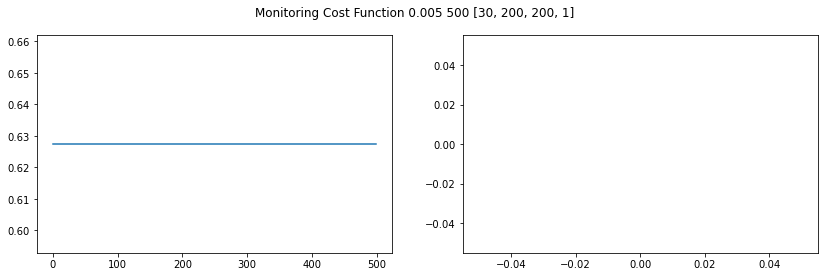

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963
epochs600_cost:nan_acc:0.6274165202108963
epochs800_cost:nan_acc:0.6274165202108963


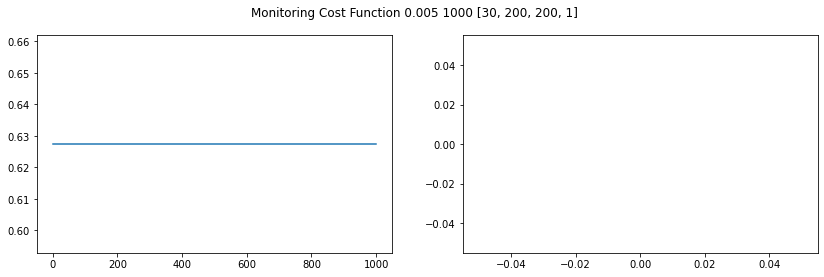

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963
epochs600_cost:nan_acc:0.6274165202108963
epochs800_cost:nan_acc:0.6274165202108963
epochs1000_cost:nan_acc:0.6274165202108963
epochs1200_cost:nan_acc:0.6274165202108963
epochs1400_cost:nan_acc:0.6274165202108963
epochs1600_cost:nan_acc:0.6274165202108963
epochs1800_cost:nan_acc:0.6274165202108963
epochs2000_cost:nan_acc:0.6274165202108963
epochs2200_cost:nan_acc:0.6274165202108963
epochs2400_cost:nan_acc:0.8734622144112478
epochs2600_cost:nan_acc:0.9121265377855887
epochs2800_cost:nan_acc:0.9156414762741653
epochs3000_cost:nan_acc:0.9173989455184535
epochs3200_cost:nan_acc:0.9103690685413005
epochs3400_cost:nan_acc:0.9103690685413005
epochs3600_cost:nan_acc:0.9121265377855887
epochs3800_cost:nan_acc:0.9138840070298769
epochs4000_cost:nan_acc:0.9173989455184535
epochs4200_cost:nan_acc:0.9191564147627417
epochs4400_cost:nan_acc:0.9226713532513181
epochs4600_cost:nan_acc:0.9226713532513181
epochs4800_cost

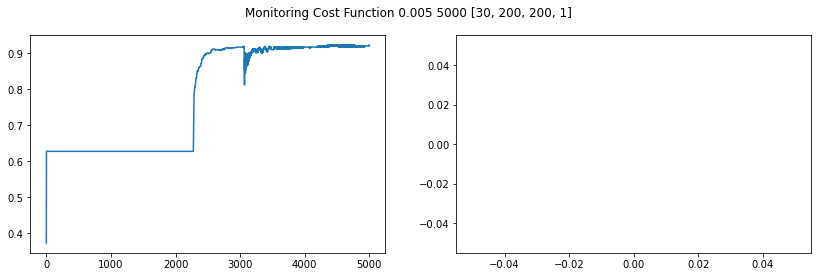

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963


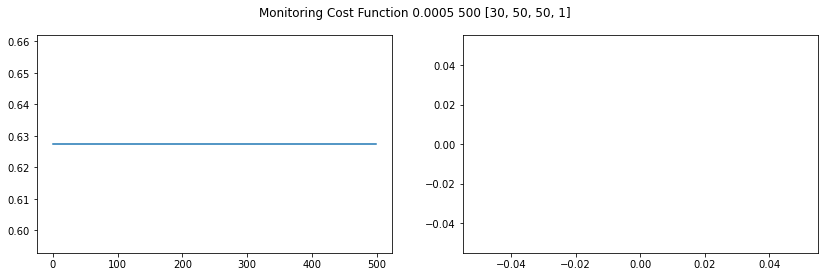

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963
epochs600_cost:nan_acc:0.6274165202108963
epochs800_cost:nan_acc:0.6274165202108963


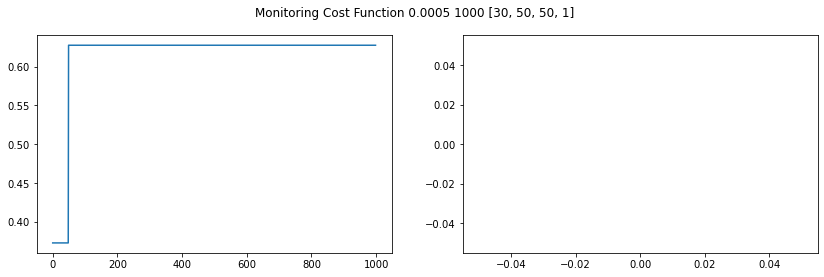

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963
epochs600_cost:nan_acc:0.6274165202108963
epochs800_cost:nan_acc:0.6274165202108963
epochs1000_cost:nan_acc:0.6274165202108963
epochs1200_cost:nan_acc:0.6274165202108963
epochs1400_cost:nan_acc:0.6274165202108963
epochs1600_cost:nan_acc:0.6274165202108963
epochs1800_cost:nan_acc:0.6274165202108963
epochs2000_cost:nan_acc:0.6274165202108963
epochs2200_cost:nan_acc:0.6274165202108963
epochs2400_cost:nan_acc:0.6274165202108963
epochs2600_cost:nan_acc:0.6274165202108963
epochs2800_cost:nan_acc:0.6274165202108963
epochs3000_cost:nan_acc:0.6274165202108963
epochs3200_cost:nan_acc:0.6274165202108963
epochs3400_cost:nan_acc:0.6274165202108963
epochs3600_cost:nan_acc:0.6274165202108963
epochs3800_cost:nan_acc:0.6274165202108963
epochs4000_cost:nan_acc:0.6274165202108963
epochs4200_cost:nan_acc:0.6274165202108963
epochs4400_cost:nan_acc:0.6274165202108963
epochs4600_cost:nan_acc:0.6274165202108963
epochs4800_cost

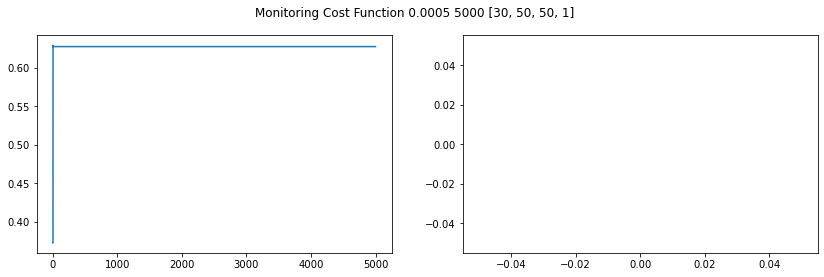

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963


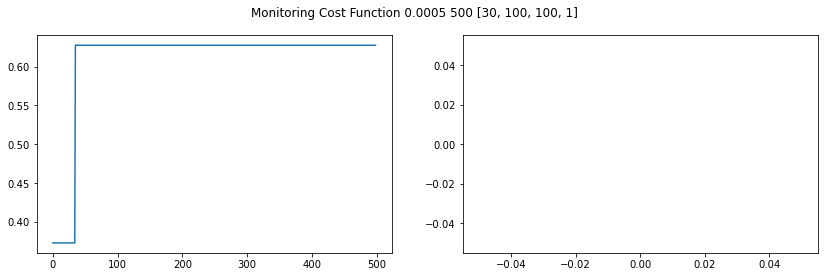

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963
epochs600_cost:nan_acc:0.6274165202108963
epochs800_cost:nan_acc:0.6274165202108963


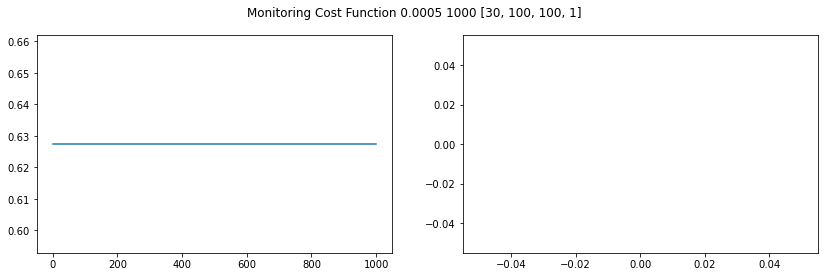

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963
epochs600_cost:nan_acc:0.6274165202108963
epochs800_cost:nan_acc:0.6274165202108963
epochs1000_cost:nan_acc:0.6274165202108963
epochs1200_cost:nan_acc:0.6274165202108963
epochs1400_cost:nan_acc:0.6274165202108963
epochs1600_cost:nan_acc:0.6274165202108963
epochs1800_cost:nan_acc:0.6274165202108963
epochs2000_cost:nan_acc:0.6274165202108963
epochs2200_cost:nan_acc:0.6274165202108963
epochs2400_cost:nan_acc:0.6274165202108963
epochs2600_cost:nan_acc:0.6274165202108963
epochs2800_cost:nan_acc:0.6274165202108963
epochs3000_cost:nan_acc:0.6274165202108963
epochs3200_cost:nan_acc:0.6274165202108963
epochs3400_cost:nan_acc:0.6274165202108963
epochs3600_cost:nan_acc:0.6274165202108963
epochs3800_cost:nan_acc:0.6274165202108963
epochs4000_cost:nan_acc:0.6274165202108963
epochs4200_cost:nan_acc:0.6274165202108963
epochs4400_cost:nan_acc:0.6274165202108963
epochs4600_cost:nan_acc:0.6274165202108963
epochs4800_cost

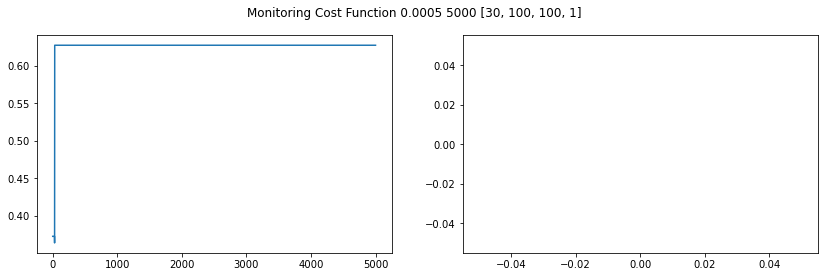

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963


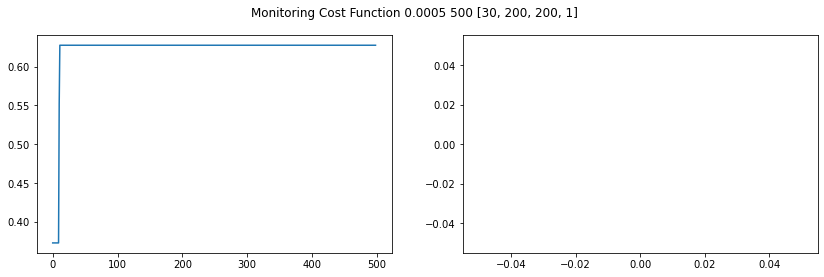

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963
epochs600_cost:nan_acc:0.6274165202108963
epochs800_cost:nan_acc:0.6274165202108963


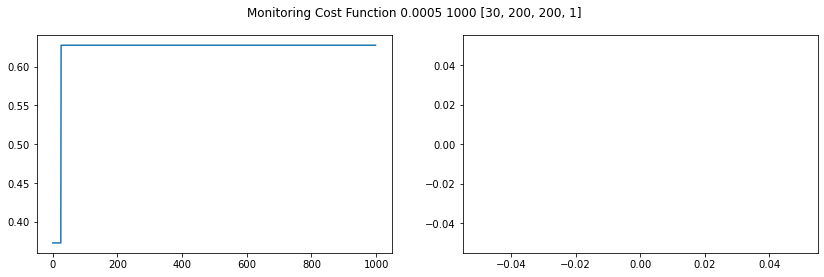

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963
epochs600_cost:nan_acc:0.6274165202108963
epochs800_cost:nan_acc:0.6274165202108963
epochs1000_cost:nan_acc:0.6274165202108963
epochs1200_cost:nan_acc:0.6274165202108963
epochs1400_cost:nan_acc:0.6274165202108963
epochs1600_cost:nan_acc:0.6274165202108963
epochs1800_cost:nan_acc:0.6274165202108963
epochs2000_cost:nan_acc:0.6274165202108963
epochs2200_cost:nan_acc:0.6274165202108963
epochs2400_cost:nan_acc:0.6274165202108963
epochs2600_cost:nan_acc:0.6274165202108963
epochs2800_cost:nan_acc:0.6274165202108963
epochs3000_cost:nan_acc:0.6274165202108963
epochs3200_cost:nan_acc:0.6274165202108963
epochs3400_cost:nan_acc:0.6274165202108963
epochs3600_cost:nan_acc:0.6274165202108963
epochs3800_cost:nan_acc:0.6274165202108963
epochs4000_cost:nan_acc:0.6274165202108963
epochs4200_cost:nan_acc:0.6274165202108963
epochs4400_cost:nan_acc:0.6274165202108963
epochs4600_cost:nan_acc:0.6274165202108963
epochs4800_cost

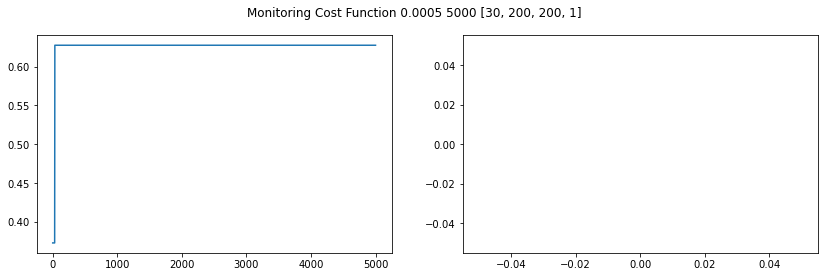

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963


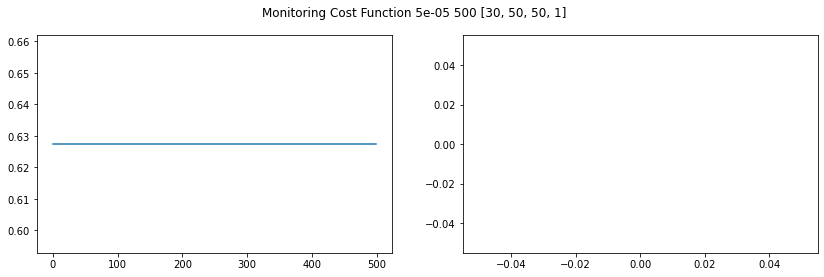

epochs200_cost:nan_acc:0.37258347978910367
epochs400_cost:nan_acc:0.37258347978910367
epochs600_cost:nan_acc:0.6274165202108963
epochs800_cost:nan_acc:0.6274165202108963


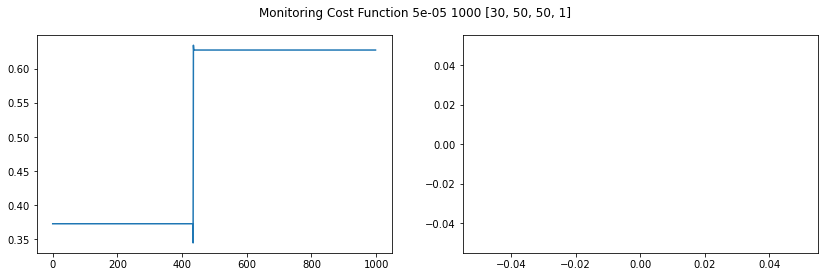

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963
epochs600_cost:nan_acc:0.6274165202108963
epochs800_cost:nan_acc:0.6274165202108963
epochs1000_cost:nan_acc:0.6274165202108963
epochs1200_cost:nan_acc:0.6274165202108963
epochs1400_cost:nan_acc:0.6274165202108963
epochs1600_cost:nan_acc:0.6274165202108963
epochs1800_cost:nan_acc:0.6274165202108963
epochs2000_cost:nan_acc:0.6274165202108963
epochs2200_cost:nan_acc:0.6274165202108963
epochs2400_cost:nan_acc:0.6274165202108963
epochs2600_cost:nan_acc:0.6274165202108963
epochs2800_cost:nan_acc:0.6274165202108963
epochs3000_cost:nan_acc:0.6274165202108963
epochs3200_cost:nan_acc:0.6274165202108963
epochs3400_cost:nan_acc:0.6274165202108963
epochs3600_cost:nan_acc:0.6274165202108963
epochs3800_cost:nan_acc:0.6274165202108963
epochs4000_cost:nan_acc:0.6274165202108963
epochs4200_cost:nan_acc:0.6274165202108963
epochs4400_cost:nan_acc:0.6274165202108963
epochs4600_cost:nan_acc:0.6274165202108963
epochs4800_cost

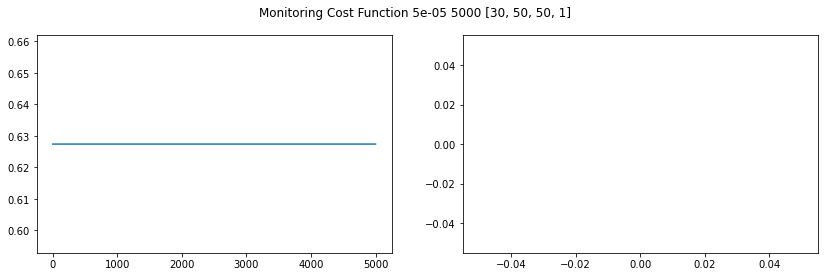

epochs200_cost:nan_acc:0.37258347978910367
epochs400_cost:nan_acc:0.6274165202108963


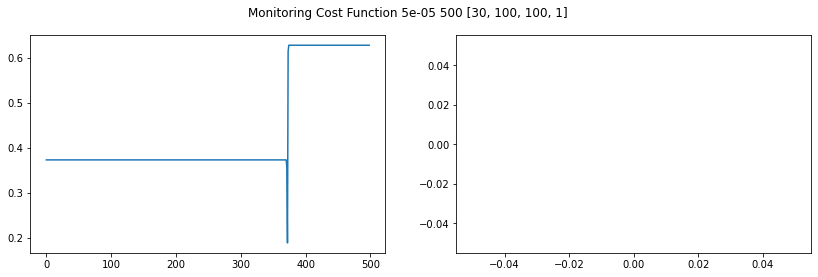

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963
epochs600_cost:nan_acc:0.6274165202108963
epochs800_cost:nan_acc:0.6274165202108963


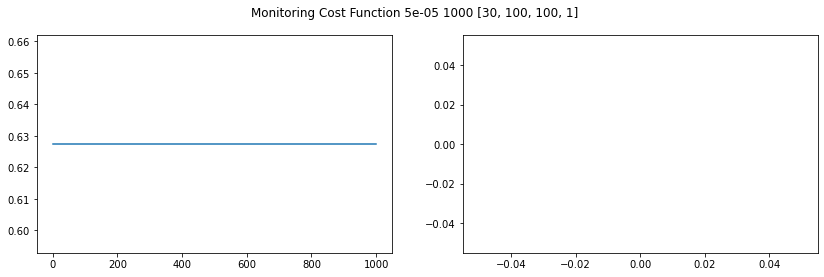

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963
epochs600_cost:nan_acc:0.6274165202108963
epochs800_cost:nan_acc:0.6274165202108963
epochs1000_cost:nan_acc:0.6274165202108963
epochs1200_cost:nan_acc:0.6274165202108963
epochs1400_cost:nan_acc:0.6274165202108963
epochs1600_cost:nan_acc:0.6274165202108963
epochs1800_cost:nan_acc:0.6274165202108963
epochs2000_cost:nan_acc:0.6274165202108963
epochs2200_cost:nan_acc:0.6274165202108963
epochs2400_cost:nan_acc:0.6274165202108963
epochs2600_cost:nan_acc:0.6274165202108963
epochs2800_cost:nan_acc:0.6274165202108963
epochs3000_cost:nan_acc:0.6274165202108963
epochs3200_cost:nan_acc:0.6274165202108963
epochs3400_cost:nan_acc:0.6274165202108963
epochs3600_cost:nan_acc:0.6274165202108963
epochs3800_cost:nan_acc:0.6274165202108963
epochs4000_cost:nan_acc:0.6274165202108963
epochs4200_cost:nan_acc:0.6274165202108963
epochs4400_cost:nan_acc:0.6274165202108963
epochs4600_cost:nan_acc:0.6274165202108963
epochs4800_cost

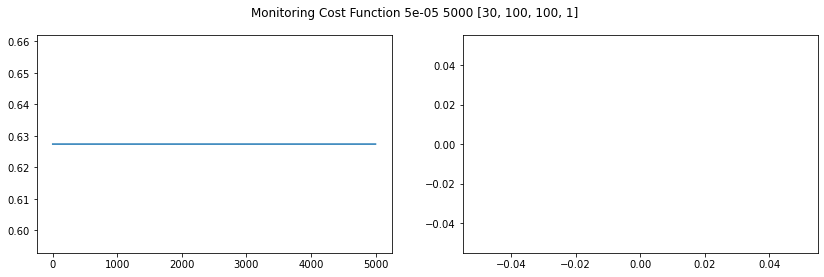

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963


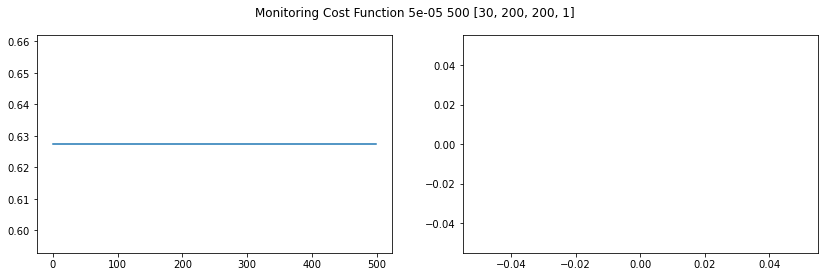

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963
epochs600_cost:nan_acc:0.6274165202108963
epochs800_cost:nan_acc:0.6274165202108963


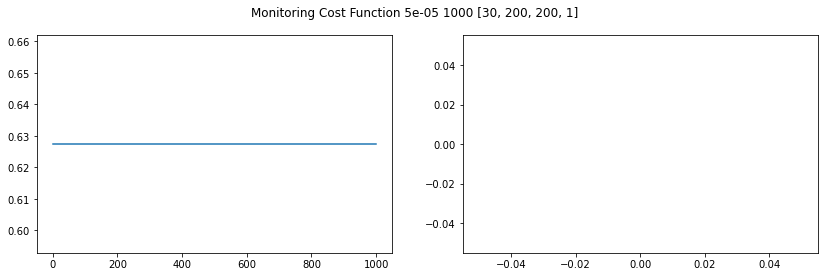

epochs200_cost:nan_acc:0.6274165202108963
epochs400_cost:nan_acc:0.6274165202108963
epochs600_cost:nan_acc:0.6274165202108963
epochs800_cost:nan_acc:0.6274165202108963
epochs1000_cost:nan_acc:0.6274165202108963
epochs1200_cost:nan_acc:0.6274165202108963
epochs1400_cost:nan_acc:0.6274165202108963
epochs1600_cost:nan_acc:0.6274165202108963
epochs1800_cost:nan_acc:0.6274165202108963
epochs2000_cost:nan_acc:0.6274165202108963
epochs2200_cost:nan_acc:0.6274165202108963
epochs2400_cost:nan_acc:0.6274165202108963
epochs2600_cost:nan_acc:0.6274165202108963
epochs2800_cost:nan_acc:0.6274165202108963
epochs3000_cost:nan_acc:0.6274165202108963
epochs3200_cost:nan_acc:0.6274165202108963
epochs3400_cost:nan_acc:0.6274165202108963
epochs3600_cost:nan_acc:0.6274165202108963
epochs3800_cost:nan_acc:0.6274165202108963
epochs4000_cost:nan_acc:0.6274165202108963
epochs4200_cost:nan_acc:0.6274165202108963
epochs4400_cost:nan_acc:0.6274165202108963
epochs4600_cost:nan_acc:0.6274165202108963
epochs4800_cost

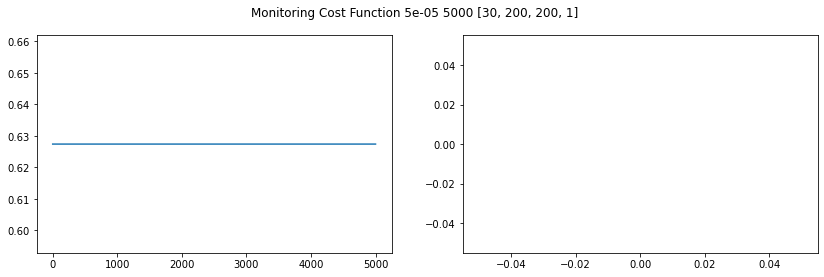

In [25]:
for eta in [0.5,0.05,0.01,0.005,0.0005,0.00005]:
    for layer_set in [[30,50,50,1],[30,100,100,1],[30,200,200,1]]:
        for iter_n in [500,1000,5000]:
            parameters = nn_multilayer(eta = eta, iterations= iter_n, layer_dims=layer_set, epsilon = 0.01).fit(X,y)